In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
hints = pd.read_csv("HINTS_filtered.csv")

In [3]:
hints.shape

(3630, 194)

In [4]:
print(hints.isna().sum())

Unnamed: 0            0
Stratum               0
HIGHSPANLI            0
HISPSURNAME           0
HISP_HH               0
                   ... 
EducA                89
EducB                89
BMI                 178
smokeStat            53
IncomeRanges_IMP    119
Length: 194, dtype: int64


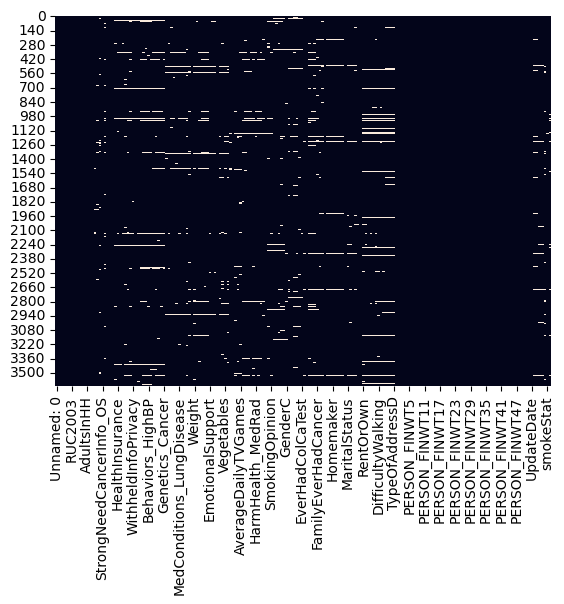

In [5]:
sns.heatmap(hints.isnull(), cbar=False)
plt.show()

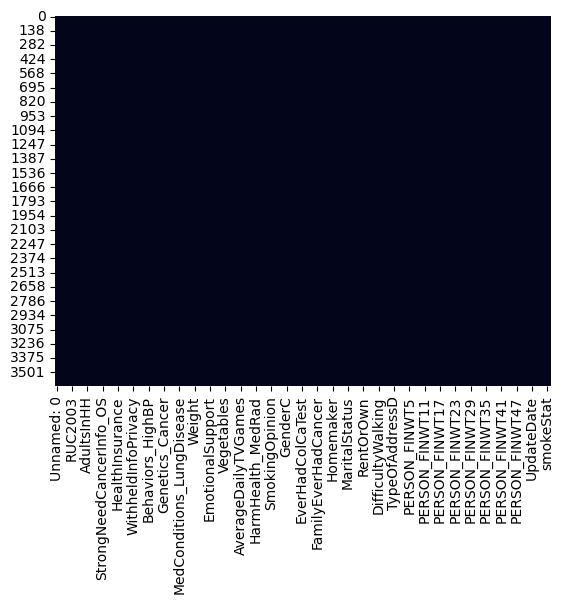

In [6]:
hints = hints.dropna()
sns.heatmap(hints.isnull(), cbar=False)
plt.show()

## <font color='Indigo'> Random Selection of features </font>

In [7]:
import random
def select_random_features(df, num_features):
    features = df.columns.tolist()
    features.remove('EverHadCancer')
    selected_features = random.sample(features, num_features)
    return selected_features

def select_random_features_with_rs(df, num_features,rs):
    features = df.columns.tolist()
    features.remove('EverHadCancer')
    random.seed(rs)
    selected_features = random.sample(features, num_features)
    return selected_features

In [8]:
hints_selected = hints[select_random_features(hints, 15) + ['EverHadCancer']]
hints_selected.head()

,CancerTrustDoctor,PERSON_FINWT17,Genetics_HeartDisease,PERSON_FINWT27,PERSON_FINWT19,AccessPHR,EverHadColCaTest,PERSON_FINWT0,HarmHealth_HouseholdChem,TotalHousehold,UseMenuCalorieInfo,MedConditions_Arthritis,Height_Inches,SeekHealthInfo,FamilyEverHadCancer,EverHadCancer
0,1.0,47610,1.0,46489,46367,1.0,2.0,46129,3.0,5.0,5.0,2.0,7,1,1.0,2.0
2,1.0,37101,2.0,32567,30161,2.0,2.0,30831,2.0,2.0,4.0,2.0,3,1,2.0,2.0
3,1.0,8497,2.0,8542,0,1.0,2.0,8838,3.0,1.0,2.0,2.0,3,1,1.0,2.0
5,1.0,107165,1.0,104277,102270,1.0,2.0,102368,3.0,2.0,5.0,2.0,11,1,1.0,2.0
8,1.0,123846,2.0,129396,124313,1.0,2.0,123532,4.0,2.0,3.0,1.0,10,2,1.0,2.0


## <font color='Indigo'> Training model and data balancing with oversampling using SMOTE </font>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [10]:
def trainRFClassisfier(X, y):
  # Oversample the minority class using SMOTE
  sm = SMOTE(random_state=0)
  X_resampled, y_resampled = sm.fit_resample(X, y)
  
  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
  
  # Train the Random Forest classifier
  rfc = RandomForestClassifier(random_state=0, n_estimators=40)
  rfc.fit(X_train, y_train)

  # Print the training accuracy
  #print('Training accuracy:', rfc.score(X_train, y_train))
  #print('Test accuracy:', rfc.score(X_test, y_test))
  #return rfc, X_train_resampled, y_train_resampled, X_test, y_test
  return rfc, rfc.score(X_train, y_train), rfc.score(X_test, y_test)

### <font color='yellowgreen'> *Keeping everything at one place* </font>

<font color='DarkOrchid'> <b> Without random state</b> </font>

In [12]:
# Inptu Format:: select_random_features(dataframe, num_of_features)
hints_selected = hints[select_random_features(hints, 15) + ['EverHadCancer']]
X = hints_selected.drop('EverHadCancer', axis=1)
y = hints_selected['EverHadCancer']
res,train_acc, test_acc = trainRFClassisfier(X,y)
print('Training accuracy:', train_acc, 'Test accuracy:', test_acc)

Training accuracy: 1.0 Test accuracy: 0.9495225102319236


<font color='DarkOrchid'> <b> With random state</b> </font>

In [13]:
# Inptu Format:: select_random_features(dataframe, num_of_features, ranodom_state)
hints_selected = hints[select_random_features_with_rs(hints, 15, 10) + ['EverHadCancer']]
X = hints_selected.drop('EverHadCancer', axis=1)
y = hints_selected['EverHadCancer']
res,train_acc, test_acc = trainRFClassisfier(X,y)
print('Training accuracy:', train_acc, 'Test accuracy:', test_acc)

Training accuracy: 1.0 Test accuracy: 0.9413369713506139


## <font color='lightcoral'> On final_hints_dataset.csv </font>

In [14]:
hints_final = pd.read_csv("final_hints_dataset.csv")

In [15]:
hints_final = hints_final.drop(columns=['Unnamed: 0'])

In [16]:
hints_final.shape

(2678, 21)

In [17]:
# Inptu Format:: select_random_features(dataframe, num_of_features, ranodom_state)
hints_selected = hints_final[select_random_features(hints_final, 10) + ['EverHadCancer']]
X = hints_selected.drop('EverHadCancer', axis=1)
y = hints_selected['EverHadCancer']
res,train_acc, test_acc = trainRFClassisfier(X,y)
print('Training accuracy:', train_acc, 'Test accuracy:', test_acc)

Training accuracy: 0.9962845010615711 Test accuracy: 0.9299363057324841


In [18]:
for i in range(20):
    hints_selected = hints_final[select_random_features(hints_final, 10) + ['EverHadCancer']]
    X = hints_selected.drop('EverHadCancer', axis=1)
    y = hints_selected['EverHadCancer']
    res,train_acc, test_acc = trainRFClassisfier(X,y)
    print('Training accuracy:', train_acc, 'Test accuracy:', test_acc)

Training accuracy: 0.9957537154989384 Test accuracy: 0.9256900212314225
Training accuracy: 1.0 Test accuracy: 0.9320594479830149
Training accuracy: 0.9912420382165605 Test accuracy: 0.9140127388535032
Training accuracy: 0.9952229299363057 Test accuracy: 0.9076433121019108
Training accuracy: 0.988588110403397 Test accuracy: 0.8895966029723992
Training accuracy: 0.9593949044585988 Test accuracy: 0.8842887473460722
Training accuracy: 0.9731953290870489 Test accuracy: 0.8949044585987261
Training accuracy: 0.9997346072186837 Test accuracy: 0.9256900212314225
Training accuracy: 0.9830148619957537 Test accuracy: 0.9023354564755839
Training accuracy: 0.9973460721868365 Test accuracy: 0.9087048832271762
Training accuracy: 0.994692144373673 Test accuracy: 0.9203821656050956
Training accuracy: 1.0 Test accuracy: 0.9023354564755839
Training accuracy: 0.9984076433121019 Test accuracy: 0.9341825902335457
Training accuracy: 0.9543524416135881 Test accuracy: 0.8927813163481954
Training accuracy: 0.997